In [1]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
FILE_PATH = "../MovieData_Clean.csv"

In [3]:
df = pd.read_csv(FILE_PATH)
print(df.shape)
df.head()

(714, 12)


,Movie_Title,Released_Year,Rating,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,No_of_Votes,Gross,Num_Genres
0,The Shawshank Redemption,1994,R,142,Drama,9.3,80.0,Frank Darabont,Tim Robbins,2343110,28341469,1
1,The Godfather,1972,R,175,Crime,9.2,100.0,Francis Ford Coppola,Marlon Brando,1620367,134966411,2
2,The Dark Knight,2008,PG-13,152,Action,9.0,84.0,Christopher Nolan,Christian Bale,2303232,534858444,3
3,The Godfather: Part II,1974,R,202,Crime,9.0,90.0,Francis Ford Coppola,Al Pacino,1129952,57300000,2
4,12 Angry Men,1957,G,96,Crime,9.0,96.0,Sidney Lumet,Henry Fonda,689845,4360000,2


In [4]:
all_genres = df['Genre'].unique()
print(all_genres)

['Drama' 'Crime' 'Action' 'Biography' 'Western' 'Comedy' 'Adventure'
 'Animation' 'Horror' 'Mystery' 'Film-Noir' 'Family']


In [5]:
df.groupby("Genre")["No_of_Votes"].sum()

Genre
Action       69295576
Adventure    21755604
Animation    20331427
Biography    22948401
Comedy       24658538
Crime        30665424
Drama        55068842
Family         551221
Film-Noir      158731
Horror        3595316
Mystery       3961519
Western       1289665
Name: No_of_Votes, dtype: int64

In [12]:
# Calculate total votes
total_votes = genre_votes['No_of_Votes'].sum()
total_votes

254280264

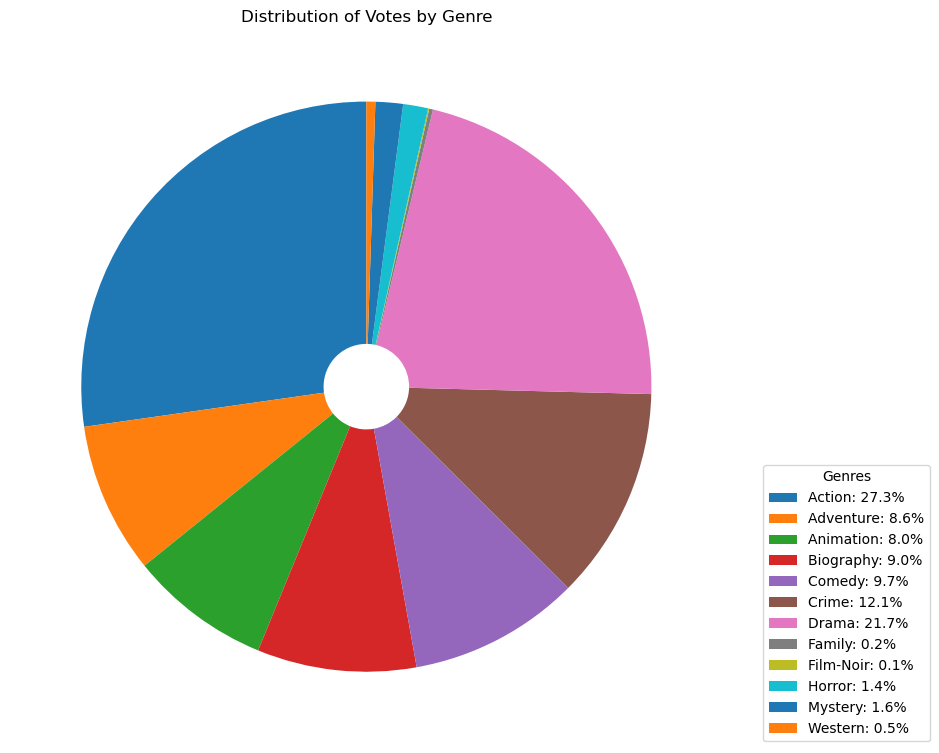

In [17]:
# Explode genre list so each has its own row
df_exploded = df.explode('Genre')

# Aggregate the data by genre, summing up the number of votes for each genre
genre_votes = df_exploded.groupby('Genre')['No_of_Votes'].sum().reset_index()

# Create a donut chart
plt.figure(figsize=(10, 8))

# Plotting the pie chart and adjusting it to make it a donut chart
plt.pie(genre_votes['No_of_Votes'],  
        autopct=None, 
        startangle=90, 
        wedgeprops=dict(width=.85))  

# Move the labels to the legend
plt.legend(genre_votes['Genre'], title="Genres", loc="upper right", fontsize=10, bbox_to_anchor=(1.3, 0.4))

# Create custom legend with genre names and their corresponding percentages
legend_labels = [f"{row['Genre']}: {row['No_of_Votes'] / total_votes * 100:.1f}%" for index, row in genre_votes.iterrows()]
plt.legend(legend_labels, title="Genres", loc="upper right", fontsize=10, bbox_to_anchor=(1.3, 0.4))

# Add a title
plt.title('Distribution of Votes by Genre')

# Display the plot
plt.tight_layout()
plt.show()

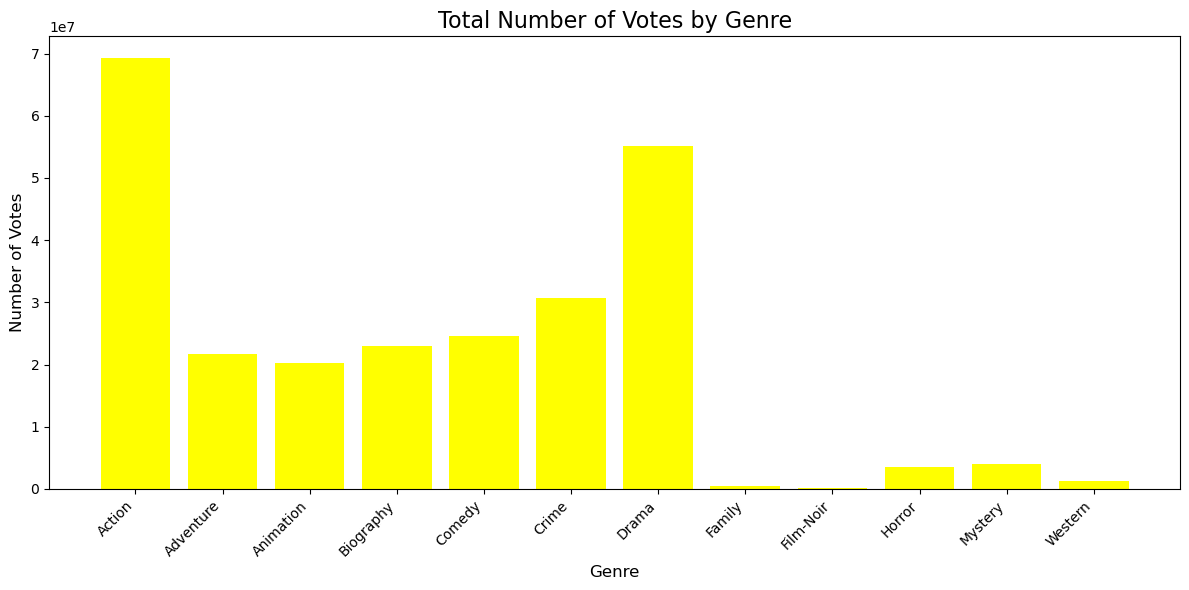

In [7]:
plt.figure(figsize=(12, 6))

# Plotting the bar chart
plt.bar(genre_votes['Genre'], genre_votes['No_of_Votes'], color='yellow')

# Add title and labels
plt.title('Total Number of Votes by Genre', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Votes', fontsize=12)

# Rotate x-axis labels to make them readable
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()  # Ensures that the labels don't get cut off
plt.show()

In [ ]:
#conclude that Action is the genre with the most number of votes, followed by Drama and Adventure. 